In [1]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#This function calculates the invariant mass of e+e-
def massa_invariante(p1,p2, num_eventos):
    
    massa_invariante = []
    
    for i in range(num_eventos):
        mI = 0
        for j in range(4):
            if j == 0:
                tensor = 1
            else:
                tensor = -1
            mI = mI + tensor*((p1[i][j]+p2[i][j])**2)
        massa_invariante.append(np.sqrt(mI))
        

    
    return massa_invariante

In [3]:
def leitor_quadrimomento(file_name):
    p1 = []
    p2 = []

    #This file was generated using the cards.
    num_eventos = pylhe.readNumEvents(file_name)


    for e in pylhe.readLHE(file_name):
        quadrimomento1 = []
        quadrimomento2 = []
        for mu in ['e','px','py','pz']:
            quadrimomento1.append(getattr(e.particles[-1],mu))
            quadrimomento2.append(getattr(e.particles[-2],mu))
        p1.append(quadrimomento1)
        p2.append(quadrimomento2)

    return p1,p2,num_eventos


In [36]:
p1,p2,num_eventos = leitor_quadrimomento('unweighted_events_ppaa.lhe')
p1h,p2h,num_eventosh = leitor_quadrimomento('unweighted_events_pphaa.lhe')




In [37]:
weights = []
weights = 300000*[0.002448276]

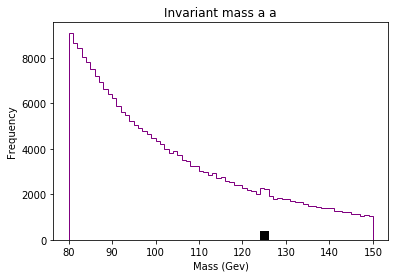

In [38]:
#Plotando o histograma

histogram = plt.hist(massa_invariante(p1,p2,num_eventos), bins = 70, color = 'purple', range = (80,150), histtype = 'step')

histogram1 = plt.hist(massa_invariante(p1h,p2h,num_eventosh), bins = 70, color = 'black', range = (80,150), weights = weights)

plt.title('Invariant mass a a')
plt.xlabel('Mass (Gev)')
plt.ylabel('Frequency')
plt.savefig('Massa_invariante')
plt.figure(figsize=[20.0,10.0], dpi = 3000)
plt.show()